**Final Project Submission** 

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Bank Marketing Campaign

This project was completed as part of Flatiron School's Data Science Bootcamp (Module 3 Final Project).

## Introduction

### Problem Statement

**What is a term deposit?**

From <a href = 'https://www.investopedia.com/terms/t/termdeposit.asp'>Investopedia</a>, "A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits. The investor must understand when buying a term deposit that they can withdraw their funds only after the term ends. In some cases, the account holder may allow the investor early termination—or withdrawal—if they give several days notification. Also, there will be a penalty assessed for early termination."

### Business Value

### Methodology

We will adopt the OSEMN data science workflow, which involves:
1. Obtain (import the data)
2. Scrub (clean the data, deal with missing values and data types)
3. Explore (answer descriptives questions using EDA)
4. Model (build our predictive model)
5. iNterpret (comment on our model and findings)

### Libraries

In [762]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
chosen_palette = 'Accent'
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb


from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, \
precision_score, recall_score, roc_auc_score, classification_report, plot_confusion_matrix 

from sklearn.metrics import make_scorer, precision_recall_curve


from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

import time 

# set random state
random_state = 0

## Obtain Data

A dataset for this project has been provided and can be found in the `Data` folder in this repository.

It was originally from <a href = 'https://archive.ics.uci.edu/ml/datasets/Bank+Marketing'> UCI Machine Learning Repository</a>. 

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

### Load Data

In [10]:
# Read data 
raw_df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

# Check first five rows
raw_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
# Get info
raw_df.shape

(41188, 21)

We see that we have 21 columns, with 20 feature columns and 1 target column `y`. There are 41,188 entries recorded.

### Data Dictionnary

We have been provided with the following information regarding the **features**.

`age` - (numeric)

`job` - type of job (categorical: "admin.","blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")

`marital` - marital status (categorical: "divorced", "married", "single", "unknown"; note: "divorced" means divorced or widowed)

`education` - (categorical: "basic.4y", "basic.6y", "basic.9y",  "high.school", "illiterate", "professional.course", "university.degree", "unknown")

`default` - has credit in default? (categorical: "no", "yes", "unknown")

`housing`- has housing loan? (categorical: "no", "yes", "unknown")

`loan`- has personal loan? (categorical: "no", "yes", "unknown")

`contact` - contact communication type (categorical: "cellular", "telephone")

`month` - last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

`day_of_week` - last contact day of the week (categorical: "mon", "tue", "wed", "thu", "fri")

`duration` - last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

`campaign` - number of contacts performed during this campaign and for this client (numeric, includes last contact)

`pdays` - number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

`previous` - number of contacts performed before this campaign and for this client (numeric)

`poutcome` - outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

`emp.var.rate` - Employment variation is the variation of how many people are being hired or fired due to the shifts in the conditions of the economy. - quarterly indicator (numeric)

`cons.price.idx` - The Consumer Price Index (CPI) is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food, and medical care. It is calculated by taking price changes for each item in the predetermined basket of goods and averaging them. - monthly indicator (numeric)

`cons.conf.idx` - Consumer confidence index (CCI) This consumer confidence indicator provides an indication of future developments of households' consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings. - monthly indicator (numeric)

`euribor3m` - The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. - daily indicator (numeric)

`nr.employed` - number of employees - quarterly indicator (numeric)

The **target** variable `y` is whether the client subscribed to a term deposit (binary: "yes", "no")

### Train-Test Split

Before we proceed, let us split our data into test and training sets. This test set will be use to evaluate our final model and we would like it to be completely new to us to avoid any data snooping bias.

We will ensure that the target variable `y` classes are proportional in the test set to ensure as based on our domain expertise we suspect that the classes will be unbalanced, with "yes" being a minority class.

In [12]:
# Train-test Split
train_set, test_set = train_test_split(raw_df, test_size = 0.1, stratify=raw_df['y'], random_state = 0)

print(f'Train set Shape: {train_set.shape}')
print(f'Test set Shape: {test_set.shape}')

Train set Shape: (37069, 21)
Test set Shape: (4119, 21)


## Scrub Data

Let us clean our DataFrame to ensure it is fit for exploration and modelling. We will work on a copy of the training set.

In [13]:
# Create copy to work with
df = train_set.reset_index(drop = True).copy()

### Check Data Types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 21 columns):
age               37069 non-null int64
job               37069 non-null object
marital           37069 non-null object
education         37069 non-null object
default           37069 non-null object
housing           37069 non-null object
loan              37069 non-null object
contact           37069 non-null object
month             37069 non-null object
day_of_week       37069 non-null object
duration          37069 non-null int64
campaign          37069 non-null int64
pdays             37069 non-null int64
previous          37069 non-null int64
poutcome          37069 non-null object
emp.var.rate      37069 non-null float64
cons.price.idx    37069 non-null float64
cons.conf.idx     37069 non-null float64
euribor3m         37069 non-null float64
nr.employed       37069 non-null float64
y                 37069 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

All data types appear correct.

### Missing / Placeholder Values

In [15]:
# Check for missing values
df.isna().any().any()

False

This tells us there are no explicit `NaN` missing values. However there could still be placeholder values, say if a particular number was used to denote no data for numerical attributes or a string such as 'not known' for categorical attributes.

Let's first check the numerical attributes using the describe method.

In [16]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.010440,258.504627,2.572959,962.382962,0.173460,0.082918,93.576450,-40.505287,3.621223,5167.032108
std,10.409739,259.806298,2.779804,187.134790,0.496145,1.570596,0.578924,4.619696,1.734979,72.326507
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Based on the table, there do not appear to be any placeholder values in the numerical features with the exception of 999 in the `pdays` attribute,  used to to denote customers who were not previously contacted.

Let us look at `pdays` in further detail, to see how we should treat this attribute.

In [17]:
# Get value counts for pdays
df['pdays'].value_counts(normalize = True).sort_values(ascending = False)[:5]

999    0.963123
3      0.010845
6      0.009900
4      0.002698
9      0.001565
Name: pdays, dtype: float64

With 96% of entries in the `pdays` attribute being the placeholder value `999`, and the existence of attribute `previous` which contains the information whether a customer was previously contacted and how many times, it makes sense to drop this feature.

In [18]:
# Drop pdays feature
df = df.drop('pdays', axis = 1)

Let us now look at categorical features by inspecting value counts.

In [19]:
# Get categorical column list
cat_cols = df.select_dtypes(include = object).columns

# Print normalized value counts for categorical columns
for col in cat_cols:
    print(f"Feature: {col} \n{df[col].value_counts(normalize = True)} \n")

Feature: job 
admin.           0.252583
blue-collar      0.225040
technician       0.163452
services         0.095983
management       0.071138
retired          0.041841
entrepreneur     0.035555
self-employed    0.034233
housemaid        0.026167
unemployed       0.024630
student          0.021339
unknown          0.008039
Name: job, dtype: float64 

Feature: marital 
married     0.606383
single      0.280396
divorced    0.111387
unknown     0.001834
Name: marital, dtype: float64 

Feature: education 
university.degree      0.295665
high.school            0.230975
basic.9y               0.146726
professional.course    0.126683
basic.4y               0.101648
basic.6y               0.056112
unknown                0.041760
illiterate             0.000432
Name: education, dtype: float64 

Feature: default 
no         0.790796
unknown    0.209124
yes        0.000081
Name: default, dtype: float64 

Feature: housing 
yes        0.523942
no         0.451833
unknown    0.024225
Name: housing,

We see that there are `unknown` values in features `job`, `marital`, `education`, `default`, `housing` and `loan`, which we may want to address.

**job**

There is no dominating feature so our choices are to either keep `unknown` or drop the rows with missing data, which represent 0.8% of our dataset. We have selected to keep the `unknown` values as such for now but when preparing the data for modelling, we will replace it using the distance-based imputation method k-Nearest Neighbors Imputer.

**marital**

The `unknown` values represent 0.2% of our dataset. We choose to replace the `unknown` values with the mode of the feature, which is `married` (60% of values.)

**education**

Similar to job, there is no dominating feature and so our choices are either to keep `unknown` or drop the rows with missing data, which represent 4% of our dataset. As this is a higher proportion, we will choose to keep `unknown` entries for now, but will impute using the k-Nearest Neighbors Imputer when we prepare the data for modelling.

**default**

The `unknown` values represent 0.008% of the dataset. We choose to replace the `unknown` values with the mode of the feature, which is `no` (79% of features).

**housing**

This binary column is split evenly as such our choices are either to keep `unknown` or drop the rows with missing data, which represent 2.4% of the dataset. We will choose to keep `unknown` entries for now  but will impute using the k-Nearest Neighbors Imputer when we prepare the data for modelling.

**loan**

With 82% of the entries having value `no` and 2.4% of entries having value `unknown`, we think it best to replace the unknown values with no.

Let us apply these changes to our DataFrame.

In [20]:
# Cols in which to replace `unknown` with mode
cols_unknown = ['marital', 'default', 'loan']

# Replace unknown with None and drop using dropna()
for col in cols_unknown:
    df[col] = df[col].replace('unknown', None)
    df[col] = df[col].fillna(df[col].mode())

In [21]:
df['loan'].value_counts()

no     31280
yes     5789
Name: loan, dtype: int64

### Clean Syntax

We see that certain column names have a dot in the name, which we will replace with underscore. Similarly, certain values in the `education` column have a dot which we will also replace with underscore. Finally, the we will remove the dot for entries with `admin.` value in the `job` column.

In [22]:
# Clean column names
df.columns = df.columns.str.replace('.', '_')

# Clean values in education
df['education'] = df['education'].str.replace('.', '_')

# Clean values in job
df['job'] = df['job'].str.replace('.','')

### Explore Duplicates

Let us check whether our data has any duplicate entries.

In [23]:
# Get duplicates
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
6917,39,blue-collar,married,basic_6y,no,no,no,telephone,may,thu,124,1,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
9049,33,admin,married,university_degree,no,yes,no,cellular,aug,thu,59,1,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
22062,39,admin,married,university_degree,no,no,no,cellular,nov,tue,123,2,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
23171,35,admin,married,university_degree,no,yes,no,cellular,may,fri,348,4,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
24779,45,admin,married,university_degree,no,no,no,cellular,jul,thu,252,1,0,nonexistent,-2.9,92.469,-33.6,1.072,5076.2,yes
29198,24,services,single,high_school,no,yes,no,cellular,apr,tue,114,1,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
29739,32,technician,single,professional_course,no,yes,no,cellular,jul,thu,128,1,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
29807,56,blue-collar,married,basic_4y,no,no,no,telephone,may,mon,136,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
33178,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
33953,41,technician,married,professional_course,no,yes,no,cellular,aug,tue,127,1,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


There appear to be 9 rows with exactly the same entries. However with the absence of a unique identifier (say a customer ID) it could very well be that these do indeed represent different customers.

Due to the small number of such entries, we will keep them as such. However it is worth informing our stakeholders that it would be preferable for the data to include a unique identifier.

## Explore and Visualise Data

### Target Variable

Let us begin by visualising the distribution of our target variable `y`, whether the customer subscribed to a term deposit.

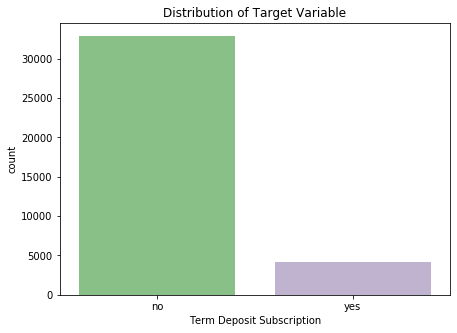

In [24]:
# Plot distribution of y
plt.figure(figsize = (7,5))
sns.countplot(df['y'], palette = chosen_palette)
plt.xlabel('Term Deposit Subscription')
plt.title('Distribution of Target Variable')
plt.show()

In [25]:
df['y'].value_counts(normalize = True)

no     0.887345
yes    0.112655
Name: y, dtype: float64

We immediately notice that we are dealing with imbalanced classes, with 88% of the entries representing data for a customer who did not subscribe to the term deposit. 

We will need to account for this imbalance or our model may be biased towards the majority class. We will also need to carefully select our evaluation metric to based on the business scenario. This is discussed in section X.

### Features

Let's investigate our features. We have a mix of numerical and categorical features to examine.

We begin by visualising numerical attributes via histograms.

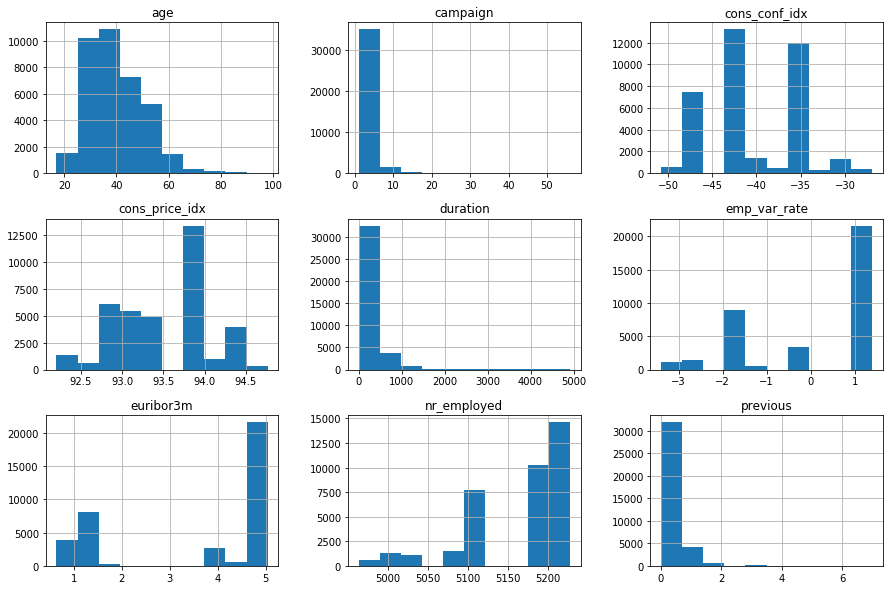

In [26]:
# Plot histograms
df.hist(figsize = (15,10))
plt.show()

Let us visualize **categorical** attributes using barplots. We will distinguish between `yes` or `no` values of our target variable to get an initial idea of which attributes might have the biggest impact on whether a customer will subscribe to a term deposit.

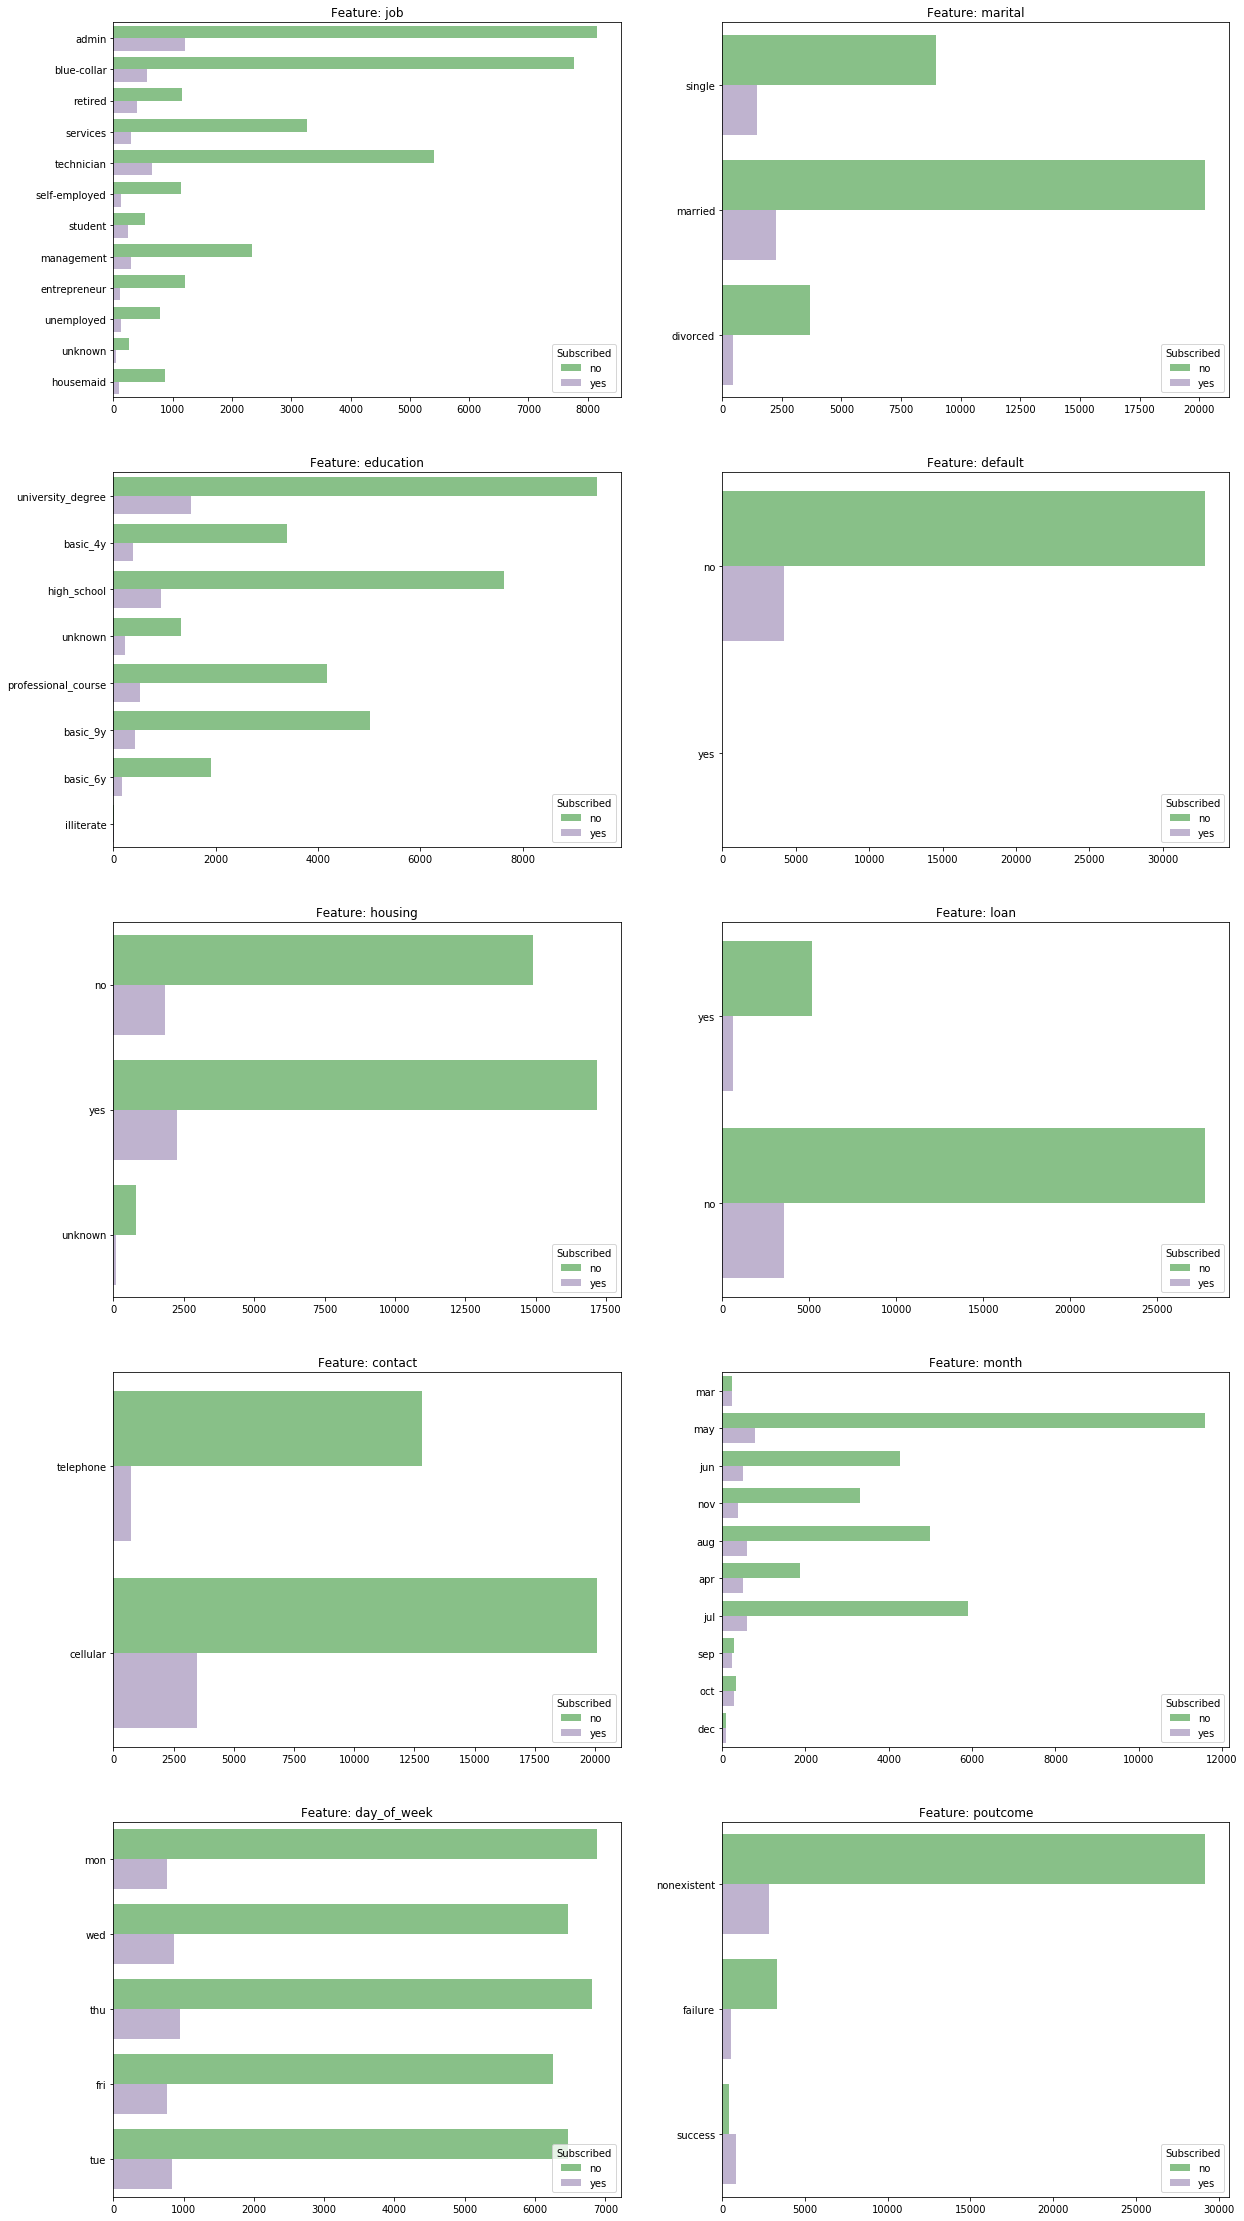

In [27]:
# Define cat feats as catcols less last item y
cat_feats = list(cat_cols)[:-1]

# Create barplot of categorical features with hue target variable

fig, axes = plt.subplots(5,2, figsize = (20,40))

for c, col in enumerate(cat_feats):
    ax_x = c // 2
    ax_y = c % 2
    sns.countplot(y = df[col], orient = 'h', hue = df['y'], palette = chosen_palette, ax = axes[ax_x, ax_y])
    
    axes[ax_x, ax_y].set_title(f'Feature: {col}')
    axes[ax_x, ax_y].set_ylabel(None) 
    axes[ax_x, ax_y].set_xlabel(None) 
    axes[ax_x, ax_y].legend(title = "Subscribed", loc = 'lower right') 
plt.show()

Due to the class imbalance, it is difficult to see which attributes have the highest impact on the target variable. 

For instance, when looking at `job`, we just see fewer `yes` observations for every type of `job`. Let us try and improve on this, by looking at the `rate` of subscribers for each job category. Once we have a more useful visualization, we will extend to the other categorical variables.

In [28]:
# Establish counts of subscribers based on job using grouby
counts = df[['job', 'y']].groupby(['job','y']).size().unstack()
counts

y,no,yes
job,,
admin,8150,1213
blue-collar,7773,569
entrepreneur,1202,116
housemaid,876,94
management,2338,299
retired,1161,390
self-employed,1136,133
services,3266,292
student,538,253


In [29]:
# Count number of observations for each job category
job_counts = counts.sum(axis = 'columns')
job_counts

job
admin            9363
blue-collar      8342
entrepreneur     1318
housemaid         970
management       2637
retired          1551
self-employed    1269
services         3558
student           791
technician       6059
unemployed        913
unknown           298
dtype: int64

In [30]:
# Obtain proportions by dividing by the respective job counts
job_props = counts.div(job_counts, axis = 'index')
job_props

y,no,yes
job,,
admin,0.870448,0.129552
blue-collar,0.931791,0.068209
entrepreneur,0.911988,0.088012
housemaid,0.903093,0.096907
management,0.886614,0.113386
retired,0.748549,0.251451
self-employed,0.895193,0.104807
services,0.917931,0.082069
student,0.680152,0.319848


Now that the yes or no subscription rates for each education level add up to 1, we can see that customers who are `students` or `retired` are most likely to subscribe to a term deposit.

We can visualize this clearly with a stacked bar chart.

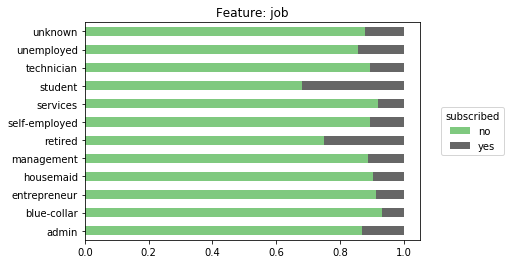

In [31]:
# Plot stacked bar chart
job_props.plot.barh(stacked = True, colormap = chosen_palette)
# Have legend to the side
plt.legend(
    loc = 'center left',
    bbox_to_anchor = (1.05,0.5),
    title = 'subscribed')
plt.title('Feature: job')
plt.ylabel(None)
plt.show()

Let us define a function to create this plot, so that we can then easily apply it to the other features.

In [32]:
# Define function for stacked barplot

def feature_rate_plot(col, target, df, colormap = chosen_palette, ax = None):
    
    counts = df[[col, target]].groupby([col,target]).size().unstack()
    col_counts = counts.sum(axis = 'columns')
    col_props = counts.div(col_counts, axis = 'index')
    
    # Plot stacked bar chart
    col_props.plot.barh(stacked = True, colormap = colormap, ax = ax )
    
    if ax == None:
        plt.title(f'Feature: {col}')
        plt.legend(
            loc = 'center left',
            bbox_to_anchor = (1.05,0.5),
            title = 'subscribed')
        plt.ylabel(None)
        
    else:
        ax.set_title(f'Feature: {col}')
        ax.legend().remove()
        ax.set_ylabel(None)

Let us apply this function to create stacked barplots of all categorical features highlighting the rate of subscription.

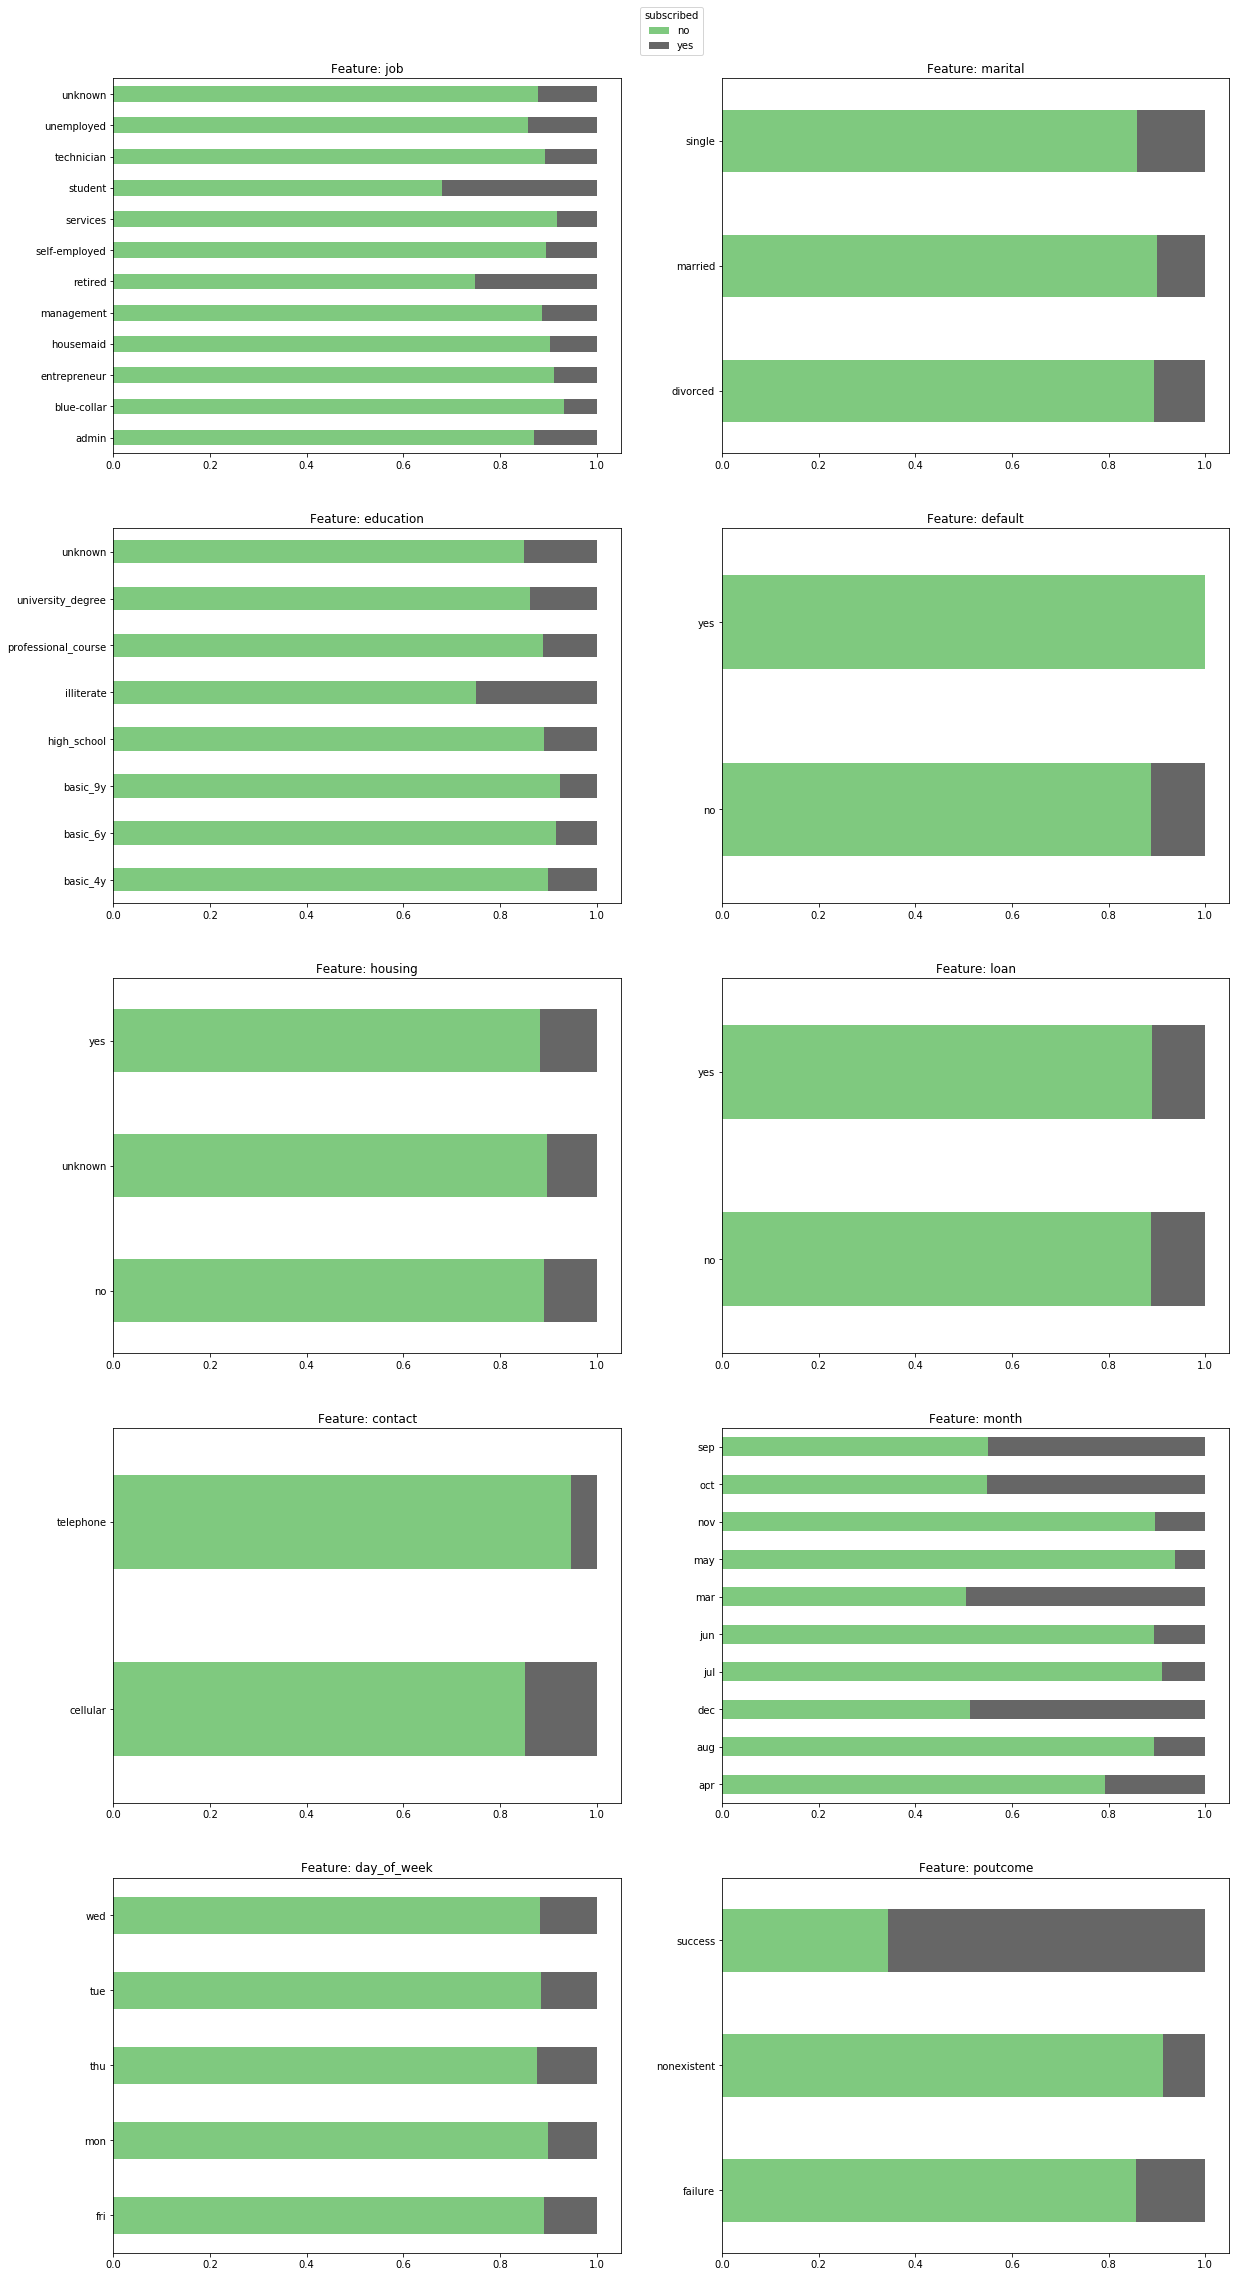

In [33]:
# Create barplot of categorical features with target variable rate

fig, axes = plt.subplots(5,2, figsize = (20,40))

for c, col in enumerate(cat_feats):
    ax_x = c // 2
    ax_y = c % 2
    feature_rate_plot(col, 'y', df, ax = axes[ax_x, ax_y] )
    
axes[0, 0].legend(
    loc='lower center', bbox_to_anchor=(1.1, 1.05), title='subscribed'
)
plt.show()

From the visualisations, we can see that `poutcome` looks to be a good predictor, with **customers who previously subscribed to a term deposit likely to do so again**. Out of customers who subscribed last time (`poutcome` has value `success`) 65% subscribed again.

Also **students** and **retired** customers are more likely to subscribe to a term deposit. This is in line with expectations as they are less likely to need the funds for emergencies and able to manage their outgoings effectively.

### Analysis of Duration and Campaign Features

From the data dictionary we note that `duration` represents the last contact duration, in seconds (numeric). This attribute highly affects the output target (as if duration=0 then the customer definitely did not subscribe to the term deposit and `y` is `no`). Moreover, the duration is not known before a call is performed and after the end of the call `y` is obviously known. Therefore we will examine this variable here but discard it when building a realistic predictive model.

In [34]:
# Describe duration feature
df['duration'].describe()

count    37069.000000
mean       258.504627
std        259.806298
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

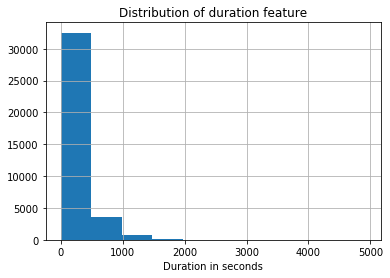

In [35]:
# Plot distribution of duration feature
df['duration'].hist()
plt.title('Distribution of duration feature')
plt.xlabel('Duration in seconds')
plt.show()

In [36]:
# Define categorical attribute which maps duration to above and below average
df['duration_cat'] = df['duration'].map(lambda x: 'above average' if x > df['duration'].mean() \
                                        else 'below average')

We can visualise this attribute using our previously defined `feature_rate_plot` function.

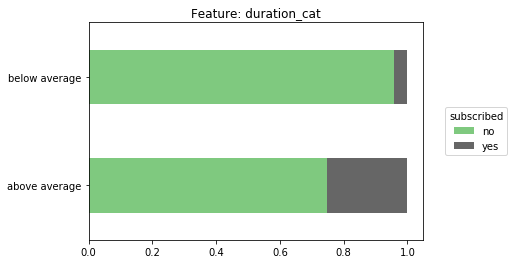

In [37]:
# Plot stacked bar chart
feature_rate_plot('duration_cat', 'y', df)

Let us now focus on customers which did subscribe to the term deposit (target variable `y` is `yes`) and look to analyse the call duration.

In [38]:
# Describe duration feature where target variable is yes
df[df['y'] == 'yes']['duration'].describe()

count    4176.000000
mean      553.282807
std       402.990684
min        37.000000
25%       254.000000
50%       447.000000
75%       741.250000
max      4199.000000
Name: duration, dtype: float64

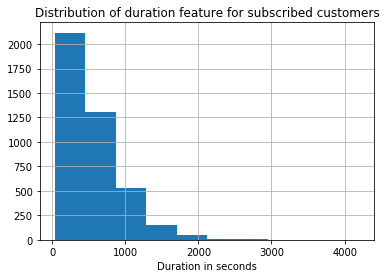

In [39]:
# Plot duration distribution where target variable is yes
df[df['y'] == 'yes']['duration'].hist()
plt.title('Distribution of duration feature for subscribed customers')
plt.xlabel('Duration in seconds')
plt.show()

The mean call duration which resulted in a subscription is 553 seconds or just under 10 minutes.

In [438]:
# Describe duration feature where target variable is no
df[df['y'] == 'no']['duration'].describe()

count    32893.000000
mean       221.080443
std        207.418894
min          0.000000
25%         95.000000
50%        164.000000
75%        279.000000
max       4918.000000
Name: duration, dtype: float64

On the other hand, the mean call duration which did not result in a subscription is 221 seconds or a bit less than 4 minutes.

Let us know look at the `campaign` feature. It tells us the number of contacts performed during this campaign and for this client. 

In [40]:
# Describe campaign feature
df['campaign'].describe()

count    37069.000000
mean         2.572959
std          2.779804
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

We see that on average, more than one call was made to each customer. The value of 56 is clearly an outlier and possibly an error. As we won't be keeping this feature for modelling purposes, we do not need to worry about it.

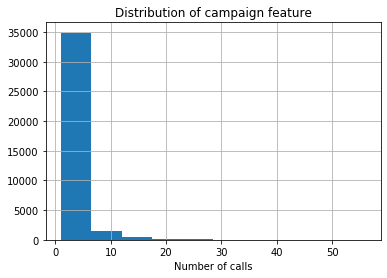

In [41]:
# Plot campaign distribution
df['campaign'].hist()
plt.title('Distribution of campaign feature')
plt.xlabel('Number of calls')
plt.show()

Let us now focus on customers which did subscribe to the term deposit (target variable `y` is `yes`) and look to analyse the `campaign` feature.

In [42]:
# Describe campaign feature where target variable is yes
df[df['y'] == 'yes']['campaign'].describe()

count    4176.000000
mean        2.046695
std         1.664846
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        23.000000
Name: campaign, dtype: float64

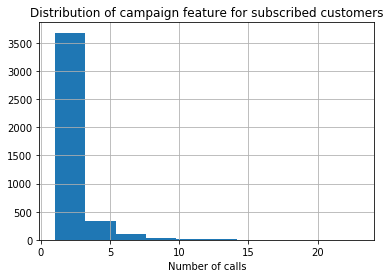

In [43]:
# Plot campaign distribution where target variable is yes
df[df['y'] == 'yes']['campaign'].hist()
plt.title('Distribution of campaign feature for subscribed customers')
plt.xlabel('Number of calls')
plt.show()

On average, it took two calls for customer to subscribe to a term deposit.

### Building a Customer Profile

In this section, our goal is to describe the profile of a typical customer who subscribed to the term deposit.

In [44]:
# Define dataframe of subscribers by taking taget value to be yes
subscribers = df[df['y']=='yes']

Let us start by looking at the `job` feature.

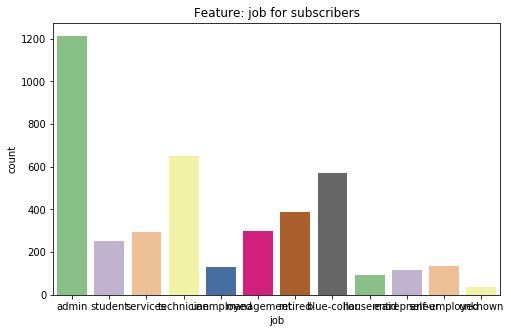

In [45]:
plt.figure(figsize = (8,5))
sns.countplot(subscribers['job'], palette = chosen_palette)
plt.title("Feature: job for subscribers")
plt.show()

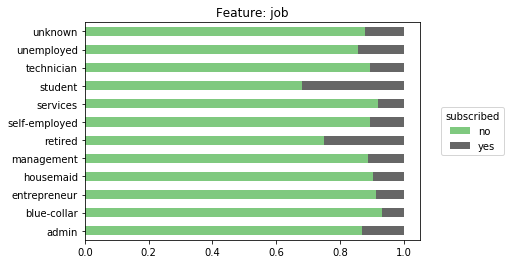

In [46]:
feature_rate_plot('job', 'y', df)

### Investigate Correlations

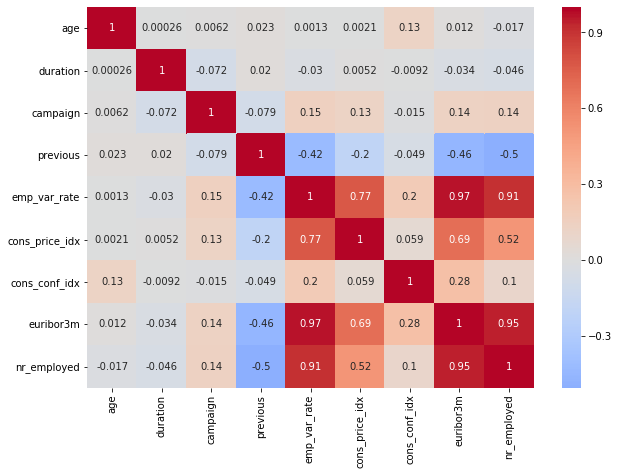

In [47]:
corr = df.corr()

# Plot heatmap
plt.figure(figsize = (10,7))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.show()

## Prepare Data for Modelling

Let us split into features `X` and target `y`.

In [48]:
# Reset df index
df = df.reset_index(drop = True)

# Split into features X/ target y
X = df.drop('y', axis = 1)
y = df['y'].copy()

In [49]:
# Map y values to 1 and 0 
y = y.map(lambda x: 1 if x == 'yes' else 0)
y.value_counts()

0    32893
1     4176
Name: y, dtype: int64

As discussed, we also have to drop the features `duration` and `campaign` as these would not be known prior to knowing the outcome of the target variable.

In [50]:
# Drop duration and campaign features
X = X.drop(['duration', 'duration_cat', 'campaign'], axis = 1)

### Feature Scaling

Let's use sklearn's `StandardScaler` to normalize the data. Note that this is not required for all algorithms, but if we don't this would have a negative impact on classifiers which rely on 'distance' such as K-Nearest Neighbours.

In [51]:
# Get data of numerical type
X_num = X.select_dtypes(include = np.number)

# Get data of categorical type
X_cat = X.select_dtypes(include = object)

# Instantiate Class
ss = StandardScaler()

# Fit and Transform Data
X_num_scaled = ss.fit_transform(X_num)

# Recreate DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns = X_num.columns)
X_num_scaled.head()

,age,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,-0.865590,-0.349621,-1.198872,-1.266936,-2.055296,-1.043383,-0.939255
1,-0.385264,-0.349621,0.647586,0.721261,0.888661,0.712281,0.331389
2,0.671453,1.665946,-1.198872,-1.180568,-1.232720,-1.357512,-0.939255
3,0.671453,-0.349621,0.838599,1.534850,-0.280263,0.775684,0.844348
4,0.671453,-0.349621,-1.198872,-1.180568,-1.232720,-1.370192,-0.939255


Let's recreate our DataFrame by combining the scaled numerical attributes and categorical attributes.

In [52]:
# Combine X_num_scaled and categorical feats using pd.concat
X = pd.concat([X_num_scaled, X_cat], axis = 1)
X.head()

,age,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,-0.865590,-0.349621,-1.198872,-1.266936,-2.055296,-1.043383,-0.939255,admin,single,university_degree,no,no,yes,telephone,mar,mon,nonexistent
1,-0.385264,-0.349621,0.647586,0.721261,0.888661,0.712281,0.331389,admin,single,university_degree,no,yes,no,telephone,may,wed,nonexistent
2,0.671453,1.665946,-1.198872,-1.180568,-1.232720,-1.357512,-0.939255,blue-collar,married,basic_4y,no,no,no,telephone,may,thu,failure
3,0.671453,-0.349621,0.838599,1.534850,-0.280263,0.775684,0.844348,retired,married,basic_4y,no,no,no,telephone,jun,fri,nonexistent
4,0.671453,-0.349621,-1.198872,-1.180568,-1.232720,-1.370192,-0.939255,services,married,high_school,no,no,no,cellular,may,mon,nonexistent


### Categorical Feature Imputing

As mentioned in the section 3. we will replace the `unknown` values in certain categorical columns using the K-Nearest Neighbors imputer. This is for columns where there was no dominating value and so the mode was not deemed to be appropriate.

There will be three steps to this process.
1. Convert non-missing categorical features to ordinal values and create an ordinal DataFrame
2. Impute the missing values in the ordinal DataFrame
3. Convert the ordinal DataFrame back to original categorical values.

In [53]:
# Define categorical columns
cat_cols = X.select_dtypes(include = object).columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [54]:
# Define feats where unknown will be replaced
cols = ['job', 'education', 'housing']

# Replace unknown with np.nan
for col in cols:
    X[col] = X[col].replace('unknown', np.nan)

# Check missing values introduced
X.isna().any()    

age               False
previous          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
job                True
marital           False
education          True
default           False
housing            True
loan              False
contact           False
month             False
day_of_week       False
poutcome          False
dtype: bool

In [55]:
# Adapted from Datacamp advanced imputation techniques
# https://campus.datacamp.com/courses/dealing-with-missing-data-in-python/advanced-imputation-techniques?ex=7

# Create dictionary for Ordinal encoders
ordinal_enc_dict = {}

# Loop over categorical columns
for col_name in cat_cols:
    
    # Create ordinal encoder instance
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    
    # Select non-null values
    col = X[col_name]
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1,1)
    
    # Encode non-null values in column
    ordinal_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Update non-null values in X with encoded values
    X.loc[col.notnull(), col_name] = np.squeeze(ordinal_vals)

# Check ordinal encoding 
X.head()

,age,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,-0.865590,-0.349621,-1.198872,-1.266936,-2.055296,-1.043383,-0.939255,0,2,6,0,0,1,1,5,1,1
1,-0.385264,-0.349621,0.647586,0.721261,0.888661,0.712281,0.331389,0,2,6,0,1,0,1,6,4,1
2,0.671453,1.665946,-1.198872,-1.180568,-1.232720,-1.357512,-0.939255,1,1,0,0,0,0,1,6,2,0
3,0.671453,-0.349621,0.838599,1.534850,-0.280263,0.775684,0.844348,5,1,0,0,0,0,1,4,0,1
4,0.671453,-0.349621,-1.198872,-1.180568,-1.232720,-1.370192,-0.939255,7,1,3,0,0,0,0,6,1,1


Now that we have performed step 1, ordinal encoding, we can proceed to step 2, imputation.

In [56]:
# Adapted from Datacamp advanced imputation techniques
# https://campus.datacamp.com/courses/dealing-with-missing-data-in-python/advanced-imputation-techniques?ex=7

# Create copy of X
X_imputed = X.copy(deep = True)

# Create imputer instance
knn_imputer = KNNImputer()

# Apply imputer
X_imputed.iloc[:,:] = knn_imputer.fit_transform(X_imputed)

# Check
X_imputed.isna().any().any()

False

Finally as step 3, we reverse the ordinal values back to categorical values.

In [57]:
# Reverse to get back to categorical values
for col_name in cat_cols:
    
    # Reshape 
    reshaped_col = X_imputed[col_name].values.reshape(-1,1)
    #
    X_imputed[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped_col)
    
# Check DataFrame
X_imputed.head()

,age,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,-0.865590,-0.349621,-1.198872,-1.266936,-2.055296,-1.043383,-0.939255,admin,single,university_degree,no,no,yes,telephone,mar,mon,nonexistent
1,-0.385264,-0.349621,0.647586,0.721261,0.888661,0.712281,0.331389,admin,single,university_degree,no,yes,no,telephone,may,wed,nonexistent
2,0.671453,1.665946,-1.198872,-1.180568,-1.232720,-1.357512,-0.939255,blue-collar,married,basic_4y,no,no,no,telephone,may,thu,failure
3,0.671453,-0.349621,0.838599,1.534850,-0.280263,0.775684,0.844348,retired,married,basic_4y,no,no,no,telephone,jun,fri,nonexistent
4,0.671453,-0.349621,-1.198872,-1.180568,-1.232720,-1.370192,-0.939255,services,married,high_school,no,no,no,cellular,may,mon,nonexistent


### Categorical Feature Encoding

Let's use sklearn's `OneHotEncoder` to encode categorical variables.

In [58]:
# Get data of type object
X_cat = X_imputed.select_dtypes(include = object)

# Instantiate Class
ohe = OneHotEncoder()

# Fit and transform 
X_cat_1hot = ohe.fit_transform(X_cat)

# View results
X_cat_1hot

<37069x47 sparse matrix of type '<class 'numpy.float64'>'
	with 370690 stored elements in Compressed Sparse Row format>

`OneHotEncoder` creates a sparse matrix, which is useful for memory purposes when dealing with large datasets and significantly more columns. However we will transform back into a Numpy array and then DataFrame.

In [59]:
# Get column names
column_names = ohe.get_feature_names(X_cat.columns)

# Recreate dataframe
X_cat_encoded = pd.DataFrame(X_cat_1hot.toarray(), columns = column_names)

X_cat_encoded.head()

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


We can now combine the above DataFrame with the numerical features in `X_imputed` to get our final prepared DataFrame.

In [60]:
# Combine numerical feats of X_imputed with X_cat_encoded using pd.concat
X_prepared = pd.concat([X_cat_encoded, X_imputed.select_dtypes(include = np.number)], axis = 1)
X_prepared.head()

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_failure,poutcome_nonexistent,poutcome_success,age,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.865590,-0.349621,-1.198872,-1.266936,-2.055296,-1.043383,-0.939255
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.385264,-0.349621,0.647586,0.721261,0.888661,0.712281,0.331389
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.671453,1.665946,-1.198872,-1.180568,-1.232720,-1.357512,-0.939255
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.671453,-0.349621,0.838599,1.534850,-0.280263,0.775684,0.844348
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.671453,-0.349621,-1.198872,-1.180568,-1.232720,-1.370192,-0.939255


In [61]:
# Check shape
X_prepared.shape

(37069, 54)

### Creating Pre-processing Classes

We will begin by creating a class to do the syntax clean up and dropping unecessary features, namely removing special characters from the column names or values and removing `duration`, `campaign` and `pdays`. We will also add methods to retrieve the cleaned column names.

In [62]:
# Define SyntaxCleaner class
# Inherit from BaseEstimator and TransformerMixin

class SyntaxCleanandDrop(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        
        # Remove special characters for column names
        specialchars = "()*&^@#$%."
        for char in specialchars:
            X.columns = X.columns.str.replace(char, '_')
        
        # Replace "." in job feat by " " as end of string
        X['job'] = X['job'].str.replace('.','')
        
        # Replace "." in education feat with "_"
        X['education'] = X['education'].str.replace('.', '_')
        
        # Drop duration, campaign and pdays
        X = X.drop(['duration', 'campaign', 'pdays'], axis = 1)
        
        # Assign num column names
        self.num_feat_names = list(X.select_dtypes(include = np.number).columns)
        
        # Assign cat column names
        self.cat_feat_names = list(X.select_dtypes(include = object).columns)
        
        return X
    
    def get_num_feat_names(self):
        return self.num_feat_names
    
    def get_cat_feat_names(self):
        return self.cat_feat_names

Our next class will be for pre-processing numerical features. Whilst we could use sklearn's in built in functions, having our custom class makes it easier to return a DataFrame.

In [63]:
class NumPreprocess (BaseEstimator, TransformerMixin):
        
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Get data of numerical type
        X_num = X.select_dtypes(include = np.number).reset_index(drop = True)
        
         # Get data of categorical type
        X_cat = X.select_dtypes(include = object).reset_index(drop = True)
        
        # Fill missing values with median if any
        for col in X_num.columns:
            X_num[col] = X_num[col].fillna(X_num[col].median())
            
        # Scale using standard scaler
        ss = StandardScaler()
        
        # Fit and Transform Data
        X_num_scaled = ss.fit_transform(X_num)
        
        # Recreate DataFrame
        X_num_scaled = pd.DataFrame(X_num_scaled, columns = X_num.columns)
        
        # Combine X_num_scaled and categorical feats using pd.concat
        X = pd.concat([X_num_scaled, X_cat], axis = 1)
        
        return X 

Our final class will be specifically for imputing the `unknown` values  in categorical features using K-Nearest Neighbors.

In [64]:
# Define UnknownImputer class
# Inherit from BaseEstimator and TransformerMixin

class UnknownImputer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        
        # Define categorical columns
        cat_cols = X.select_dtypes(include = object).columns
        
        # Replace unknown will np.nan
        for col in cat_cols:
            X[col] = X[col].replace('unknown', np.nan)
            
        # Create dictionary for Ordinal encoders
        ordinal_enc_dict = {}

        # Loop over categorical columns
        for col_name in cat_cols:
    
            # Create ordinal encoder instance
            ordinal_enc_dict[col_name] = OrdinalEncoder()
    
            # Select non-null values
            col = X[col_name]
            col_not_null = col[col.notnull()]
            reshaped_vals = col_not_null.values.reshape(-1,1)
    
            # Encode non-null values in column
            ordinal_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
            # Update non-null values in X with encoded values
            X.loc[col.notnull(), col_name] = np.squeeze(ordinal_vals)
            
        # Create copy of X
        X_imputed = X.copy(deep = True)

        # Create imputer instance
        knn_imputer = KNNImputer()

        # Apply imputer
        X_imputed.iloc[:,:] = knn_imputer.fit_transform(X_imputed)

        # Reverse to get back to categorical values
        # Select original categorical column names 
        for col_name in cat_cols:
            reshaped_col = X_imputed[col_name].values.reshape(-1,1)
            X_imputed[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped_col)
            
        return X_imputed

### Pre-processing Pipeline

We can use `ColumnTransformer` to apply different processing functions to a specific set of columns. Let's create one to apply one-hot encoding to the categorical variables.

In [65]:
# Define categorical attributes
cat_attribs = ['job', 'marital','education', 'default', 'housing', 'loan', 'contact', 'month', \
               'day_of_week', 'poutcome']

cat_process = ColumnTransformer([
    ('cat', OneHotEncoder(), cat_attribs)],
    remainder = 'passthrough')

We combine the `ColumnTransformer` above with the custom classes defined previously to create our pre-processing pipeline.

In [810]:
# Define pipeline

preproc_pipeline = Pipeline(steps =[
        ('syntaxclean', SyntaxCleanandDrop()),
        ('numprocess', NumPreprocess()),
        ('unknownimputer', UnknownImputer()),
        ('catprocess', cat_process)
])

Let us check our pipeline by applying it to a 'fresh' copy of the training set.

In [67]:
# Create copy
df_copy = train_set.reset_index(drop = True)

# Define y
y = df_copy['y']

# Map y values to 1 and 0 
y = y.map(lambda x: 1 if x == 'yes' else 0)

# Define X
X = df_copy.drop('y', axis = 1)
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,31,admin.,single,university.degree,no,no,yes,telephone,mar,mon,39,2,999,0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1
1,36,admin.,single,university.degree,no,yes,no,telephone,may,wed,126,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,47,blue-collar,married,basic.4y,unknown,no,no,telephone,may,thu,391,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1
3,47,retired,married,basic.4y,unknown,no,no,telephone,jun,fri,63,2,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
4,47,services,married,high.school,no,no,no,cellular,may,mon,261,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1


In [68]:
# Apply pipeline
X_prepared = prepross_pipeline.fit_transform(X)
X_prepared

array([[ 1.        ,  0.        ,  0.        , ..., -2.0552957 ,
        -1.04338277, -0.93925488],
       [ 1.        ,  0.        ,  0.        , ...,  0.88866088,
         0.71228134,  0.3313891 ],
       [ 0.        ,  1.        ,  0.        , ..., -1.2327196 ,
        -1.35751177, -0.93925488],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.97099786,
        -1.58403048, -1.25587889],
       [ 1.        ,  0.        ,  0.        , ...,  0.9536011 ,
         0.77337799,  0.84434765],
       [ 0.        ,  0.        ,  0.        , ...,  2.31734569,
        -1.63302308, -2.06748717]])

To check, let us get the column names and recreate a DataFrame.

In [69]:
# Get cleaned numerical column names
num_cleaned_attribs = pipeline['syntaxclean'].get_num_feat_names()

# Get one hot encoded column names
ohe_attribs = pipeline['catprocess'].transformers_[0][1].get_feature_names(cat_attribs)

# List of all columns 
attribs = list(ohe_attribs) + num_cleaned_attribs

# Show prepared df
X_prepared_df = pd.DataFrame(X_prepared, columns = attribs)
X_prepared_df.head()

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_failure,poutcome_nonexistent,poutcome_success,age,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.865590,-0.349621,-1.198872,-1.266936,-2.055296,-1.043383,-0.939255
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.385264,-0.349621,0.647586,0.721261,0.888661,0.712281,0.331389
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.671453,1.665946,-1.198872,-1.180568,-1.232720,-1.357512,-0.939255
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.671453,-0.349621,0.838599,1.534850,-0.280263,0.775684,0.844348
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.671453,-0.349621,-1.198872,-1.180568,-1.232720,-1.370192,-0.939255


In [72]:
# Convert to CSV
X_prepared_df.to_csv('data/X_train_prepared.csv')

## Modelling

### Create Evaluation Test Set

Let us load our prepared DataFrame.

In [524]:
X = pd.read_csv('data/X_train_prepared.csv', index_col = 0)
X.head()

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_failure,poutcome_nonexistent,poutcome_success,age,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.865590,-0.349621,-1.198872,-1.266936,-2.055296,-1.043383,-0.939255
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.385264,-0.349621,0.647586,0.721261,0.888661,0.712281,0.331389
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.671453,1.665946,-1.198872,-1.180568,-1.232720,-1.357512,-0.939255
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.671453,-0.349621,0.838599,1.534850,-0.280263,0.775684,0.844348
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.671453,-0.349621,-1.198872,-1.180568,-1.232720,-1.370192,-0.939255


In [706]:
# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, \
                                                    random_state = random_state)

### Choice of Evaluation Metric

As we saw in the previous section, we are dealing with unbalanced target classes.

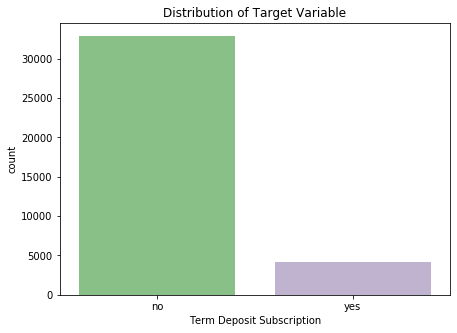

In [409]:
# Plot distribution of y
plt.figure(figsize = (7,5))
sns.countplot(df['y'], palette ='Accent')
plt.xlabel('Term Deposit Subscription')
plt.title('Distribution of Target Variable')
plt.show()

**Precision**: out of true predictions, how many are actually true.
$$ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} $$

**Recall**: out of true observations, how many were accuractly predicted.
$$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$

We introduce a profit matrix, assigning values to possible outcomes.

|        .      | Predicted N   | Predicted Y |
| ------------- | ------------- |-------------|
| **Actual N**      | 0             | - $C$         |
| **Actual Y**      | 0             | R - $C$       |

We can then define our profit metric as follows:

$$ Profit = \sum_n TP * (R - C) + \sum_n FP * (-C) $$
where we have:
* $n$ number of customers
* $C$ cost of a call
* $R$ expected revenue from a successful subscription

Based on domain knowledge, assign values to C and R.

In [741]:
# Define calculate profit function
def calc_profit(y_true, y_pred, C = 5, R = 50):
    '''
    '''
    TP = confusion_matrix(y_true, y_pred)[1, 1]
    FP = confusion_matrix(y_true, y_pred)[0, 1]
    
    profit = TP*(R-C)+FP*(-C)
    
    return profit

We can now calculate expected profit assuming we call all customers (i.e. predict `y` for all entries).

In [717]:
# Define arrays with 1s (predict yes)
y_test_pred = np.ones(len(y_test))
y_train_pred = np.ones(len(y_train))

train_profit = calc_profit(y_train, y_train_pred)
test_profit = calc_profit(y_test, y_test_pred)
print(f'Expected profit - Training set: ${train_profit}')
print(f'Expected profit - Test set: ${test_profit}')

Expected profit - Training set: $18775
Expected profit - Test set: $4680


In [716]:
# Define scorer using sklearn make_scorer
revenue = make_scorer(calc_profit, greater_is_better = True)

### Dealing with Class Imbalance

We will try two methods to adjust for the class imabalance.

First we will investigate adjusting the weights to be inversely proportional to the frequency of the classes. With Sklearn, we can set the `class_weight` parameter to be `balanced`. This means that mistakes for the minority class will be more strongly penalized than mistakes for the majority class.

In [719]:
# Instantiate 
logreg = LogisticRegression(fit_intercept = True, C = 1e17, random_state = random_state, class_weight= 'balanced')

# Fit Model
logreg.fit(X_train, y_train)

# Get Predictions
train_preds = logreg.predict(X_train)
test_preds = logreg.predict(X_test)

print('Classification Report for Train set')
print(classification_report(y_train, train_preds))
print('Classification Report for Test set')
print(classification_report(y_test, test_preds))

Classification Report for Train set
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     26314
           1       0.36      0.63      0.46      3341

    accuracy                           0.83     29655
   macro avg       0.66      0.75      0.68     29655
weighted avg       0.88      0.83      0.85     29655

Classification Report for Test set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      6579
           1       0.35      0.62      0.44       835

    accuracy                           0.83      7414
   macro avg       0.65      0.73      0.67      7414
weighted avg       0.88      0.83      0.85      7414



Now let us try using SMOTE (Synthetic Minority Oversampling Technique). This creates new synthetic data of the minority class.

In [720]:
# Create instance of SMOTE
smote = SMOTE()

# Apply smote
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

# Instantiate 
logreg = LogisticRegression(fit_intercept = True, C = 1e17, random_state = random_state)

# Fit Model
logreg.fit(X_train_resampled, y_train_resampled)

# Get Predictions
train_preds = logreg.predict(X_train_resampled)
test_preds = logreg.predict(X_test)

print('Classification Report for Train set')
print(classification_report(y_train_resampled, train_preds))
print('Classification Report for Test set')
print(classification_report(y_test, test_preds))

Classification Report for Train set
              precision    recall  f1-score   support

           0       0.70      0.85      0.77     26314
           1       0.81      0.63      0.71     26314

    accuracy                           0.74     52628
   macro avg       0.76      0.74      0.74     52628
weighted avg       0.76      0.74      0.74     52628

Classification Report for Test set
              precision    recall  f1-score   support

           0       0.95      0.85      0.89      6579
           1       0.34      0.62      0.44       835

    accuracy                           0.82      7414
   macro avg       0.64      0.73      0.67      7414
weighted avg       0.88      0.82      0.84      7414



Both methods have given good results, but we will choose to use SMOTE as it is more widely used and will work for non-parametric classifiers when we do not have the option to adjust class weights to `balanced`.

Going forward, we will therefore use `X_train_resampled` and `y_train_resampled` and be sure to incorporate SMOTE into our final pipeline.

In [721]:
# Define arrays with 1s (predict yes)
y_test_pred = np.ones(len(y_test))
y_train_pred = np.ones(len(y_train_resampled))

train_profit = calc_profit(y_train_resampled, train_preds)
test_profit = calc_profit(y_test, test_preds)
print(f'Expected profit - Training set: ${train_profit}')
print(f'Expected profit - Test set: ${test_profit}')

Expected profit - Training set: $732460
Expected profit - Test set: $18200


### Baseline Model

As a starting point and baseline model, let us try logistic regression.

In [728]:
# Instantiate Logistic Regression
logreg = LogisticRegression(fit_intercept = True, C = 1e17, random_state = random_state)

# Fit classifier
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=1e+17, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [730]:
# Get Predictions
train_preds = logreg.predict(X_train_resampled)
test_preds = logreg.predict(X_test)

print('Classification Report for Train set')
print(classification_report(y_train_resampled, train_preds))
print('Classification Report for Test set')
print(classification_report(y_test, test_preds))

Classification Report for Train set
              precision    recall  f1-score   support

           0       0.70      0.85      0.77     26314
           1       0.81      0.63      0.71     26314

    accuracy                           0.74     52628
   macro avg       0.76      0.74      0.74     52628
weighted avg       0.76      0.74      0.74     52628

Classification Report for Test set
              precision    recall  f1-score   support

           0       0.95      0.85      0.89      6579
           1       0.34      0.62      0.44       835

    accuracy                           0.82      7414
   macro avg       0.64      0.73      0.67      7414
weighted avg       0.88      0.82      0.84      7414



In [725]:
def CNF_plot(clf, X_train, y_train, X_test, y_test):
    '''
    '''
    fig, axes = plt.subplots(1,2, figsize = (10,6), sharey = 'row')
    plot_confusion_matrix(clf, X_train, y_train, values_format = '.0f', ax = axes[0])
    axes[0].set_title('Training Set Confusion Matrix') 
    plot_confusion_matrix(clf, X_test, y_test, values_format = '.0f', ax = axes[1])
    axes[1].set_title('Test Set Confusion Matrix')
    plt.show()  

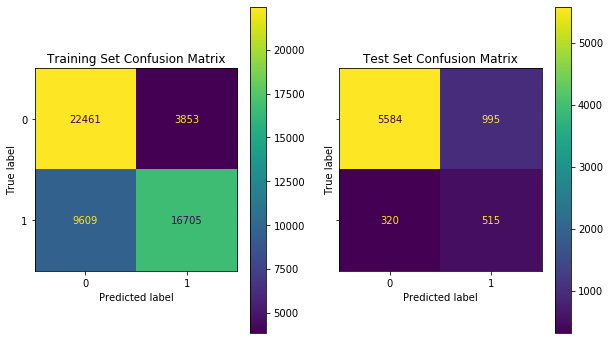

In [731]:
# Apply function
CNF_plot(logreg, X_train_resampled, y_train_resampled, X_test, y_test)

In [733]:
# Get probability scores
y_train_score = logreg.fit(X_train_resampled, y_train_resampled).predict_proba(X_train_resampled)[:,1]
y_test_score = logreg.fit(X_train_resampled, y_train_resampled).predict_proba(X_test)[:,1]

In [779]:
def ROC_plot(clf_name, y_train, y_test, y_train_score, y_test_score):
    '''
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_score)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_score)

    J_train = tpr_train - fpr_train
    ix_train = np.argmax(J_train)
    best_train_t = round(thresholds_train[ix_train],3)

    J_test = tpr_test - fpr_test
    ix_test = np.argmax(J_test)
    best_test_t = round(thresholds_test[ix_test],3)

    # Plot ROC side by side
    fig, axes = plt.subplots(1,2, figsize = (13,6))
    axes[0].plot(fpr_train, tpr_train, color='darkorange', lw=4, label= clf_name)

    axes[0].scatter(fpr_train[ix_train], tpr_train[ix_train], marker='o', 
                zorder = 3, label=f'Best Threshold = {best_train_t}')

    axes[1].plot(fpr_test, tpr_test, color='darkorange', lw=4, label= clf_name)

    axes[1].scatter(fpr_test[ix_test], tpr_test[ix_test], marker='o', 
                zorder = 3, label=f'Best Threshold = {best_test_t}')

    for ax in axes:
        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'No Skill')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc='lower right')
    axes[0].set_title(f'ROC Curve - Training Set \n AUC = {round(auc(fpr_train, tpr_train),2)}')
    axes[1].set_title(f'ROC Curve - Test Set \n AUC = {round(auc(fpr_test, tpr_test),2)}')
    plt.show()

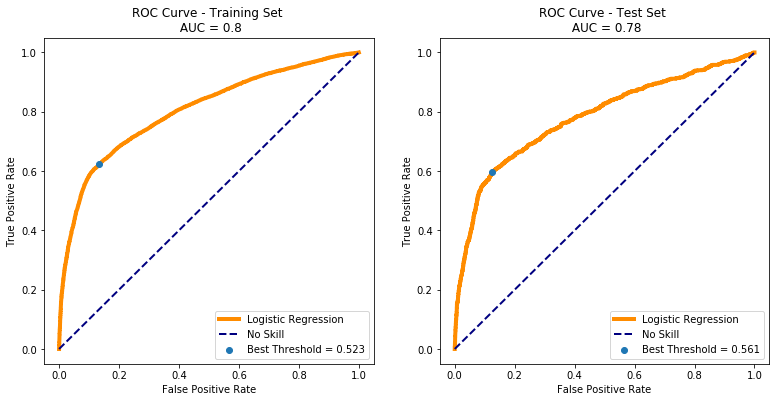

In [781]:
ROC_plot('Logistic Regression', y_train_resampled, y_test, y_train_score, y_test_score)

In [641]:
def PR_plot(clf_name, y_train, y_test, y_train_score, y_test_score):
    '''
    '''
    # Calculate train Precision-Recall curve
    precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_train_score)

    # Calculate test Precision-Recall curve
    precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_test_score)

    # Calculate train f-score
    fscore_train = (2 * precision_train * recall_train) / (precision_train + recall_train)
    # Get the index of the largest train f-score
    ix_train = np.argmax(fscore_train)
    # Get best train threshold
    best_train_t = round(thresholds_train[ix_train],3)

    # Calculate train f-score
    fscore_test = (2 * precision_test * recall_test) / (precision_test + recall_test)
    # Get the index of the largest train f-score
    ix_test = np.argmax(fscore_test)
    # Get best train threshold
    best_test_t = round(thresholds_test[ix_test],3)

    # Plot PR side by side
    fig, axes = plt.subplots(1,2, figsize = (13,6))
    axes[0].plot(precision_train, recall_train, color='darkorange', lw=4, label= clf_name)

    axes[0].scatter(precision_train[ix_train], recall_train[ix_train], marker='o', 
               zorder = 3, label=f'Best Threshold = {best_train_t}')

    axes[1].plot(precision_test, recall_test, color='darkorange', lw=4, label= clf_name)

    axes[1].scatter(precision_test[ix_test], recall_test[ix_test], marker='o', 
                zorder = 3, label=f'Best Threshold = {best_test_t}')

    for ax in axes:
        ax.plot([0, 1], [0, 0], color='navy', lw=2, linestyle='--', label = 'No Skill')
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.legend(loc='top right')
    axes[0].set_title(f'Precision/Recall Curve - Training Set')
    axes[1].set_title(f'Precision/Recall Curve - Test Set')
    plt.show()

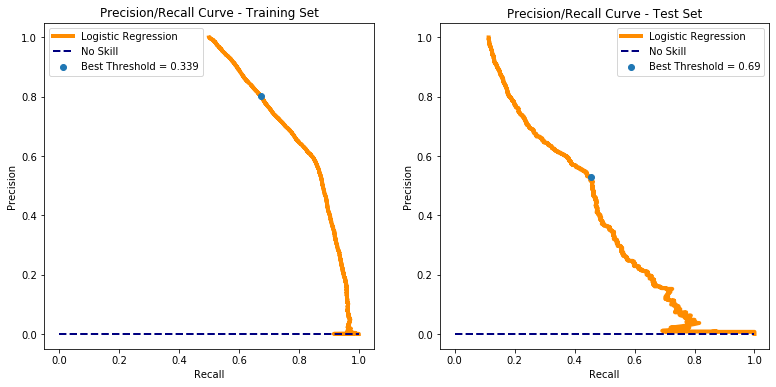

In [735]:
PR_plot('Logistic Regression', y_train_resampled, y_test, y_train_score, y_test_score)

In [738]:
# Define function to map probability to label
def get_class(proba, threshold):
    return (proba >= threshold).astype('int')


def profit_threshold_optimizer(y, y_score):
    '''
    '''
    # Define thresholds
    thresholds = np.arange(0,1,0.1)
    
    # Calculate profit for each threshold
    profits = []
    for t in thresholds:
        y_preds = get_class(y_score, t)
        profit = calc_profit(y, y_preds)
        profits.append(profit)
    
    # Get best threshold and best profit
    ix = np.argmax(profits)
    best_t = thresholds[ix]
    best_profit = profits[ix] 
    
    return best_t, best_profit

In [739]:
# Apply to training set
best_t, best_profit = profit_threshold_optimizer(y_train_resampled, y_train_score)
print(f'Train Threshold: {best_t}')
print(f'Train Profit: ${best_profit}')

Train Threshold: 0.0
Train Profit: $1052560


In [740]:
# Apply to training set
best_t, best_profit = profit_threshold_optimizer(y_test, y_test_score)
print(f'Train Threshold: {best_t}')
print(f'Train Profit: ${best_profit}')

Train Threshold: 0.5
Train Profit: $18200


### Classifiers

In [755]:
# Create a dictionary of classifiers
clf_dict = {
    'Logistic Regression': LogisticRegression(random_state = random_state),
  # 'K-Nearest Neighbours': KNeighborsClassifier(),
   # 'Decision Tree': DecisionTreeClassifier(random_state = random_state),
    'Naive Bayes': GaussianNB(),
   # 'Support Vector Classification': SVC(random_state = random_state, probability = True),
   # 'Random Forrest': RandomForestClassifier(random_state = random_state),
   # 'AdaBoost': AdaBoostClassifier(random_state = random_state),
   # 'Gradient Boosting': GradientBoostingClassifier(random_state = random_state),
    'XGBoost' : xgb.XGBClassifier()
}

In [749]:
# Define function to batch classify

def batch_clf(X_train, y_train, X_test, y_test, clf_dict, verbose = True):
    '''
    Fits a dictionary of classifiers onto Training Set and returns a table showing scores
    
    Return: results dataframe
    '''
    # Create empty DataFrame to store results
    times = []
    train_acc_scores = []
    test_acc_scores = []
    train_f1_scores = []
    test_f1_scores = []
    train_precision_scores = []
    test_precision_scores = []
    train_recall_scores = []
    test_recall_scores = []
    train_roc_data = []
    test_roc_data = []
    train_profit_scores = []
    test_profit_scores = []
    
    # Loop through dictionary items
    for key, clf in clf_dict.items():
        start_time = time.clock()
        
        # Fit classifier
        clf_fitted = clf.fit(X_train,y_train)
        
        # Get Predictions
        train_preds = clf_fitted.predict(X_train)
        test_preds = clf_fitted.predict(X_test)
  
        
        #Get accuracy scores
        train_acc = accuracy_score(y_train, train_preds)
        train_acc_scores.append(round(train_acc,2))
        test_acc = accuracy_score(y_test, test_preds)
        test_acc_scores.append(round(test_acc,2))
        
        #Get F1 Scores
        train_f1 = f1_score(y_train, train_preds)
        train_f1_scores.append(round(train_f1,2))
        test_f1 = f1_score(y_test, test_preds)
        test_f1_scores.append(round(test_f1,2))
        
        # Get Precision Scores
        train_precision = precision_score(y_train, train_preds)
        train_precision_scores.append(round(train_precision,2))
        test_precision = precision_score(y_test, test_preds)
        test_precision_scores.append(round(test_precision,2))
        
        # Get Recall Scores
        train_recall = recall_score(y_train, train_preds)
        train_recall_scores.append(round(train_recall,2))
        test_recall = recall_score(y_test, test_preds)
        test_recall_scores.append(round(test_recall,2))
        
        # Get Probability Predictions
        train_hat = clf_fitted.predict_proba(X_train)
        train_proba = train_hat[:,1]
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_proba)
        train_roc_data.append([fpr_train, tpr_train, thresholds_train])
            
        test_hat = clf_fitted.predict_proba(X_test)
        test_proba = test_hat[:,1]
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_proba)
        test_roc_data.append([fpr_test, tpr_test, thresholds_test])
        
        # Get Profit
        
        best_t, best_profit = profit_threshold_optimizer(y_train, train_proba)
        train_profit_scores.append(best_profit)
        best_t, best_profit = profit_threshold_optimizer(y_test, test_proba)
        test_profit_scores.append(best_profit)

        end_time = time.clock()
        time_elapsed = end_time - start_time
        times.append(round(time_elapsed,2))
        
        if verbose:
            print(f'trained {key} in {round(time_elapsed,2)}')
        
    # Create results dataframe
    results = pd.DataFrame({'Model': list(clf_dict.keys()), 
                            'Time': times,
                            'Train Accuracy': train_acc_scores,
                            'Test Accuracy': test_acc_scores, 
                            'Train F1': train_f1_scores,
                            'Test F1': test_f1_scores,
                            'Train Precision' : train_precision_scores,
                            'Test Precision' : test_precision_scores,
                            'Train Recall': train_recall_scores,
                            'Test Recall': test_recall_scores,
                            'Train Profit' : train_profit_scores,
                            'Test Profit' : test_profit_scores
                            })
    
   # Plot side by side ROC curve
    fig, axes = plt.subplots(1,2, figsize = (13,6))
    
    for i in range(len(train_roc_data)):
        axes[0].plot(train_roc_data[i][0], train_roc_data[i][1], lw=4, \
                 label= f'{list(clf_dict.keys())[i]}')
        
    for i in range(len(test_roc_data)):
        axes[1].plot(test_roc_data[i][0], test_roc_data[i][1], lw=4, \
                 label= f'{list(clf_dict.keys())[i]}')    
        
    for ax in axes:
        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc='lower right')
    axes[0].set_title('Receiver operating characteristic (ROC) Curve \n Training Set')
    axes[1].set_title('Receiver operating characteristic (ROC) Curve \n Test Set')
    plt.show()

    return results

trained Logistic Regression in 2.95
trained Naive Bayes in 1.91
trained XGBoost in 14.33


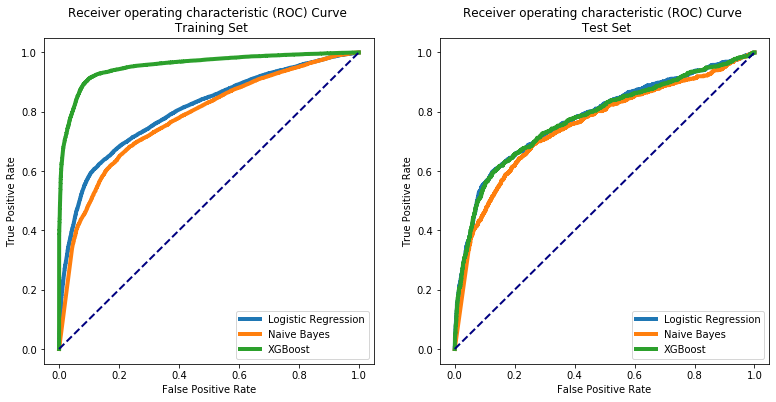

,Model,Time,Train Accuracy,Test Accuracy,Train F1,Test F1,Train Precision,Test Precision,Train Recall,Test Recall,Train Profit,Test Profit
0,Logistic Regression,2.95,0.74,0.82,0.71,0.44,0.81,0.34,0.64,0.62,1052560,18200
1,Naive Bayes,1.91,0.67,0.54,0.71,0.28,0.63,0.17,0.83,0.81,1052560,15515
2,XGBoost,14.33,0.90,0.88,0.90,0.47,0.93,0.46,0.87,0.49,1094235,18130


In [754]:
results = batch_clf(X_train_resampled, y_train_resampled, X_test.values, y_test.values, clf_dict)
results

We will eliminate Support Vector Classification due to the high run-time and average performance.

We note that certain models appear to be overfitting on the training data, namely our tree-based algorithms `Decision Tree` and `Random Forrest`.

### Tuning Classifiers

Let us apply `RandomizedSearchCV` to find the best hyperparameters to avoid overfitting and perform cross-validation too. As we wish to try a range of classifiers and parameter choices, `RandomizedSearchCV` is chosen over `GridsearchCV` for computational time. 

Once we have one or two short-listed models, we will further tune with exhaustive `GridSearchCV`.

We begin by defining the parameter grid for our classifiers.

In [683]:
# Create a dictionary of classifiers
clf_dict = {
    'Logistic Regression': LogisticRegression(random_state = random_state),
    'K-Nearest Neighbours': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state = random_state),
    'Naive Bayes': GaussianNB(),
    'Support Vector Classification': SVC(random_state = random_state),
    'Random Forrest': RandomForestClassifier(random_state = random_state),
    'AdaBoost': AdaBoostClassifier(random_state = random_state),
    'Gradient Boosting': GradientBoostingClassifier(random_state = random_state),
    'XGBoost' : xgb.XGBClassifier()
}

In [757]:
# Define param grid
RF_params = {
    'clf__max_depth': [4, 5, 6, 10, 15],
    'clf__criterion': ['gini', 'entropy'],
    'clf__n_estimators': [100, 200, 300],
    'clf__min_samples_split': [3, 5, 10],
    'clf_min_samples_leaf': [3,4,6]
}

DT_params = {
    'clf__max_depth': [5, 25, 50],
    'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_split': [6, 10],
}

LR_params = {
    'clf__solver': ['liblinear'],
    'clf__C': [0.1, 1],
}

KNN_params = {
    'clf__n_neighbors': [5, 15],
    'clf__weights': ['uniform', 'distance'],
    'clf__p': [1, 5]
}

GB_params = {
    'clf__n_estimators' : [50, 100, 200],
    'clf__max_depth' : [5, 10, 15]
}

XGB_params = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [5,10,15],
    'clf__min_child_weight': [3,5]
}

In [759]:
# Create new empty dictionary
tuning_clf_dict = {}

for k,v in clf_dict.items():
    tuning_clf_dict[k] = {}
    # Add clfs
    tuning_clf_dict[k]['clf'] = v
    
# Remove SVM
#del tuning_clf_dict['Support Vector Classification']
    
# Add Pipeline to nested dictionary
for k in tuning_clf_dict.keys():
    tuning_clf_dict[k]['pipeline'] = Pipeline([('smote', smote), ('clf', tuning_clf_dict[k]['clf'])])

In [760]:
# Add param grid to nested dictionary

# Add key param_grid and default empty dictionary value
for k in tuning_clf_dict.keys():
    tuning_clf_dict[k]['param_grid'] = {}

# Reassign parameter grid to parametric classifiers
tuning_clf_dict['Logistic Regression']['param_grid'] = LR_params
#tuning_clf_dict['Decision Tree']['param_grid'] = DT_params
#tuning_clf_dict['Random Forrest']['param_grid'] = RF_params
#tuning_clf_dict['K-Nearest Neighbours']['param_grid'] = KNN_params
#tuning_clf_dict['Gradient Boosting']['param_grid'] = GB_params
tuning_clf_dict['XGBoost']['param_grid'] = XGB_params

In [764]:
# Add RandomizedSearchCV to nested dictionary
cv = 2
scoring = 'f'

for k in tuning_clf_dict.keys():
    tuning_clf_dict[k]['rscv'] = RandomizedSearchCV(estimator = tuning_clf_dict[k]['pipeline'], 
                                                  param_distributions = tuning_clf_dict[k]['param_grid'],
                                                  scoring = scoring,
                                                  cv = cv)

In [768]:
# Extract 
rscv_dict = {}

for k in tuning_clf_dict.keys():
    rscv_dict[k] = tuning_clf_dict[k]['rscv']

trained Logistic Regression in 7.79
trained Naive Bayes in 3.92
trained XGBoost in 432.78


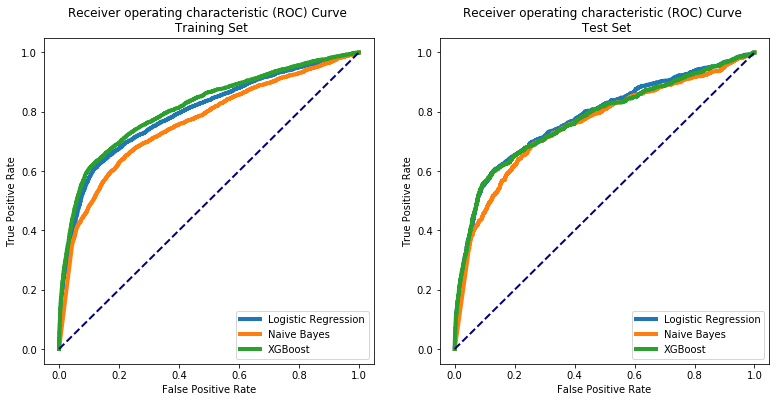

,Model,Time,Train Accuracy,Test Accuracy,Train F1,Test F1,Train Precision,Test Precision,Train Recall,Test Recall,Train Profit,Test Profit
0,Logistic Regression,7.79,0.83,0.83,0.46,0.44,0.36,0.34,0.63,0.61,76000,18210
1,Naive Bayes,3.92,0.54,0.54,0.28,0.28,0.17,0.17,0.80,0.81,61455,15560
2,XGBoost,432.78,0.89,0.88,0.52,0.48,0.49,0.46,0.54,0.50,78600,17995


In [771]:
gs_results = batch_clf(X_train.values, y_train.values, X_test.values, y_test.values, rscv_dict)
gs_results

### XGBoost

In [791]:
xgboost = xgb.XGBClassifier()

In [792]:
pipeline = Pipeline([('smote', smote), ('clf', xgboost)])

In [793]:
XGB_params = {
  #  'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [5,10,15],
 #   'clf__min_child_weight': [3,5]
}

In [794]:
cv = 3
gs_xgboost = GridSearchCV(estimator = pipeline, 
                          param_grid = XGB_params,
                          scoring = scoring,
                          cv = cv)

In [795]:
# Fit classifier
gs_xgboost_fitted = gs_xgboost.fit(X_train.values,y_train.values)
        
# Get Predictions
train_preds = gs_xgboost_fitted.predict(X_train.values)
test_preds = gs_xgboost_fitted.predict(X_test.values)

# Get Probabilities
train_hat = gs_xgboost_fitted.predict_proba(X_train.values)
train_proba = train_hat[:,1]
test_hat = gs_xgboost_fitted.predict_proba(X_test.values)
test_proba = test_prob[:,1]

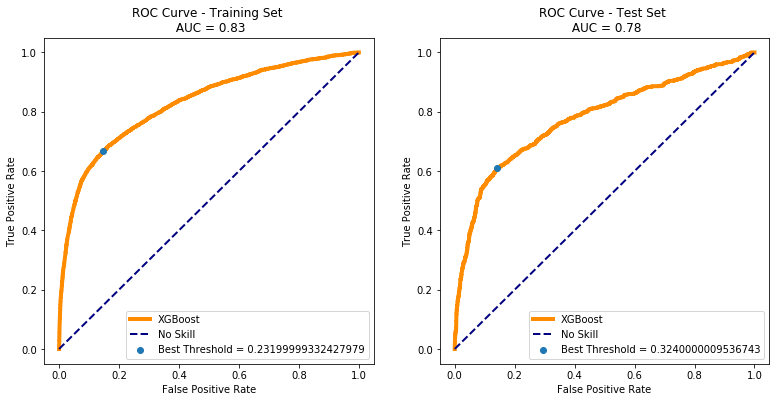

In [796]:
ROC_plot('XGBoost', y_train.values, y_test.values, train_proba, test_proba)

In [800]:
XGB_best_params = gs_xgboost.best_params_
XGB_best_params

{'clf__max_depth': 5}

In [ ]:
full_pipeline = Pipeline([
        ('syntaxclean', SyntaxCleanandDrop()),
        ('numprocess', NumPreprocess()),
        ('unknownimputer', UnknownImputer()),
        ('catprocess', cat_process),
        ('smote', smote),
        ('clf', xgb.XGBClassifier(max_depth = 5))
])

## Interpret

### Key Features

### Test Set Predictions

In [820]:
full_pipeline = Pipeline([
        ('syntaxclean', SyntaxCleanandDrop()),
        ('numprocess', NumPreprocess()),
        ('unknownimputer', UnknownImputer()),
        ('catprocess', cat_process),
        ('smote', smote),
        ('clf', xgb.XGBClassifier(max_depth = 5))
])

In [821]:
# Create copy
df_copy = train_set.reset_index(drop = True)

# Define y
y = df_copy['y']

# Map y values to 1 and 0 
y = y.map(lambda x: 1 if x == 'yes' else 0)

# Define X
X = df_copy.drop('y', axis = 1)
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,31,admin.,single,university.degree,no,no,yes,telephone,mar,mon,39,2,999,0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1
1,36,admin.,single,university.degree,no,yes,no,telephone,may,wed,126,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,47,blue-collar,married,basic.4y,unknown,no,no,telephone,may,thu,391,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1
3,47,retired,married,basic.4y,unknown,no,no,telephone,jun,fri,63,2,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
4,47,services,married,high.school,no,no,no,cellular,may,mon,261,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1


In [822]:
full_pipeline.fit(X,y)

Pipeline(memory=None,
         steps=[('syntaxclean', SyntaxCleanandDrop()),
                ('numprocess', NumPreprocess()),
                ('unknownimputer', UnknownImputer()),
                ('catprocess',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unkno...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_ra

In [831]:
X_test = test_set.drop('y', axis =1 ).reset_index(drop = True)
y_test = test_set['y'].reset_index(drop = True)

# Map y values to 1 and 0 
y_test = y_test.map(lambda x: 1 if x == 'yes' else 0)

In [858]:
# Predict on test set
test_preds = full_pipeline.predict(X_test)

In [859]:
print('Classification Report for Test set')
print(classification_report(y_test, test_preds))

Classification Report for Test set
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      3655
           1       0.29      0.59      0.39       464

    accuracy                           0.79      4119
   macro avg       0.61      0.70      0.63      4119
weighted avg       0.87      0.79      0.82      4119



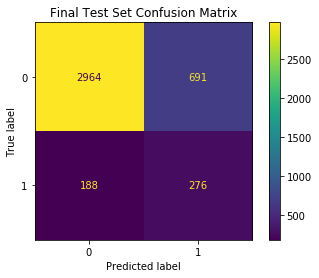

In [862]:
plot_confusion_matrix(full_pipeline, X_test, y_test, values_format = '.0f')
plt.title('Final Test Set Confusion Matrix')
plt.show()

In [832]:
# Predict on test set
full_pipeline.predict_proba(X_test)

array([[0.93112695, 0.06887306],
       [0.85844976, 0.14155026],
       [0.8539287 , 0.1460713 ],
       ...,
       [0.2958395 , 0.7041605 ],
       [0.8806981 , 0.11930194],
       [0.33031565, 0.66968435]], dtype=float32)

### Answer to Problem

In [833]:
pos_proba = full_pipeline.predict_proba(X_test)[:,1]
pos_proba_s = pd.Series(pos_proba)

test_set_with_proba = pd.concat([X_test, y_test, pos_proba_s], axis = 1)
test_set_with_proba = test_set_with_proba.rename(columns = {0: 'yes_proba'})
test_set_with_proba

In [844]:
test_set_with_proba = pd.concat([X_test, y_test, pos_proba_s], axis = 1)
test_set_with_proba = test_set_with_proba.rename(columns = {0: 'yes_proba'})
test_set_with_proba

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,yes_proba
0,40,housemaid,divorced,high_school,no,no,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,1,0.068873
1,46,admin,married,high_school,no,yes,no,telephone,may,wed,...,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0,0.141550
2,29,blue-collar,married,basic_9y,unknown,yes,no,telephone,may,wed,...,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0,0.146071
3,50,retired,married,professional_course,no,yes,no,cellular,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,1,0.228520
4,40,admin,single,high_school,no,no,no,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0,0.101380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,33,self-employed,single,university_degree,no,no,no,telephone,jun,thu,...,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0,0.157947
4115,44,admin,divorced,high_school,no,yes,yes,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,0.457275
4116,57,blue-collar,divorced,basic_4y,no,no,no,cellular,jun,mon,...,12,1,success,-2.9,92.963,-40.8,1.266,5076.2,0,0.704161
4117,35,technician,divorced,professional_course,no,no,yes,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,0.119302


In [848]:
top_500 = test_set_with_proba.sort_values('yes_proba', ascending = False)[:500]
top_500.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,yes_proba
3056,37,technician,single,professional_course,no,yes,no,cellular,nov,wed,...,6,4,success,-1.1,94.767,-50.8,1.044,4963.6,1,0.942420
3790,45,unemployed,married,high_school,no,no,no,cellular,sep,wed,...,6,2,success,-1.1,94.199,-37.5,0.880,4963.6,0,0.927844
1709,30,admin,single,university_degree,no,yes,no,cellular,jun,thu,...,3,2,success,-2.9,92.963,-40.8,1.260,5076.2,0,0.925724
340,39,admin,married,high_school,no,no,no,cellular,aug,thu,...,4,1,success,-2.9,92.201,-31.4,0.873,5076.2,1,0.924038
1003,46,unemployed,single,university_degree,no,no,no,cellular,mar,tue,...,10,2,success,-1.8,93.369,-34.8,0.646,5008.7,1,0.922099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,29,admin,single,university_degree,no,no,yes,cellular,apr,wed,...,999,0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,0,0.644636
2568,54,management,married,university_degree,no,yes,no,cellular,apr,thu,...,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,0,0.644346
82,63,retired,married,unknown,no,no,no,telephone,apr,wed,...,999,0,nonexistent,-1.8,93.075,-47.1,1.445,5099.1,0,0.644231
3809,36,admin,single,basic_9y,no,yes,yes,telephone,apr,wed,...,999,0,nonexistent,-1.8,93.749,-34.6,0.644,5008.7,1,0.641262


In [849]:
# Get num of y
top_500['y'].value_counts()

0    315
1    185
Name: y, dtype: int64

In [850]:
0.2*500

100.0

In [851]:
85*50

4250

In [852]:
0.2*4119

823.8000000000001

## Interpret Model

In [806]:
gs_xgboost.best_estimator_[1].feature_importances_



array([0.04755248, 0.02162321, 0.01352911, 0.01884012, 0.024746  ,
       0.0138625 , 0.01596073, 0.02153147, 0.0040183 , 0.02465978,
       0.01348236, 0.04554444, 0.02318667, 0.01223168, 0.01605841,
       0.01528171, 0.03827311, 0.03056551, 0.00296471, 0.0167857 ,
       0.02401891, 0.        , 0.        , 0.03164561, 0.        ,
       0.03498742, 0.        , 0.0285296 , 0.        , 0.00700422,
       0.00491375, 0.        , 0.00406355, 0.00472417, 0.00595177,
       0.00416391, 0.00445891, 0.01441304, 0.0041467 , 0.04485517,
       0.02664651, 0.02762653, 0.03743099, 0.04091549, 0.0093555 ,
       0.00307515, 0.01801858, 0.00467771, 0.00128711, 0.00350761,
       0.0034656 , 0.03374963, 0.01573388, 0.13593498], dtype=float32)

### Key Features